In [2]:
import pandas as pd
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math

df = pd.read_csv("hotels-parsed-added-facilities/westminster(parsed1)_facilities.csv")
df.head()

,Guest_country,Room_info,Nights_stayed,Date of stay,Travel_type,Review,Grade,Title,Negative,Positive,Facilities
0,Australia,Studio King (Family),3,July 2019,Family,Perfect location. Convenient to everywhere.,10.0,Exceptional,0,1,location|
1,United Kingdom,Superior Double Room - Disability Access,2,March 2021,Couple,The view was very nice. The presentation of t...,10.0,Overall it’s a very good place with great staff,0,1,location|food|
2,United Kingdom,Two-Bedroom Suite with Terrace,1,February 2021,Family,From start to finish they hotel was happy to ...,10.0,Exceptional,0,1,location|
3,United Kingdom,Studio King (Family),1,March 2021,Family,The staff were great,10.0,Exceptional,0,1,staff|
4,United Kingdom,Superior Twin Room with Internal View,1,March 2021,Solo traveler,This is a fabulous hotel at the best of times...,10.0,Exceptional,0,1,staff|


In [3]:
df.shape

(10630, 11)

In [4]:
df.isnull().sum()

Guest_country       0
Room_info           0
Nights_stayed       0
Date of stay        0
Travel_type         0
Review              0
Grade               0
Title               0
Negative            0
Positive            0
Facilities       2040
dtype: int64

In [5]:
df.dropna(inplace=True)
df.isnull().sum()

Guest_country    0
Room_info        0
Nights_stayed    0
Date of stay     0
Travel_type      0
Review           0
Grade            0
Title            0
Negative         0
Positive         0
Facilities       0
dtype: int64

{'location': 3478, 'food': 999, 'staff': 2007, 'noisiness': 214, 'drink': 545, 'comfort': 1167, 'bathroom': 396, 'dirty': 1014, 'tv': 146, 'covid': 115, 'bed': 681, 'price': 364, 'restaurant': 400, 'fitness': 253, 'temperature': 50, 'wifi': 38, 'parking': 43}
{'food': 1121, 'restaurant': 366, 'drink': 728, 'bathroom': 664, 'noisiness': 171, 'staff': 1125, 'bed': 494, 'tv': 169, 'location': 787, 'comfort': 242, 'price': 781, 'dirty': 597, 'parking': 91, 'temperature': 83, 'fitness': 353, 'covid': 173, 'wifi': 44}


<BarContainer object of 17 artists>

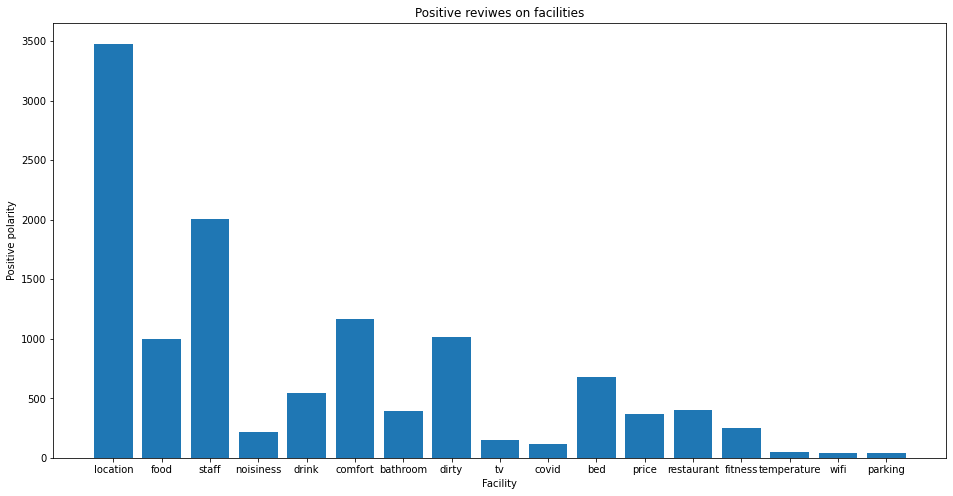

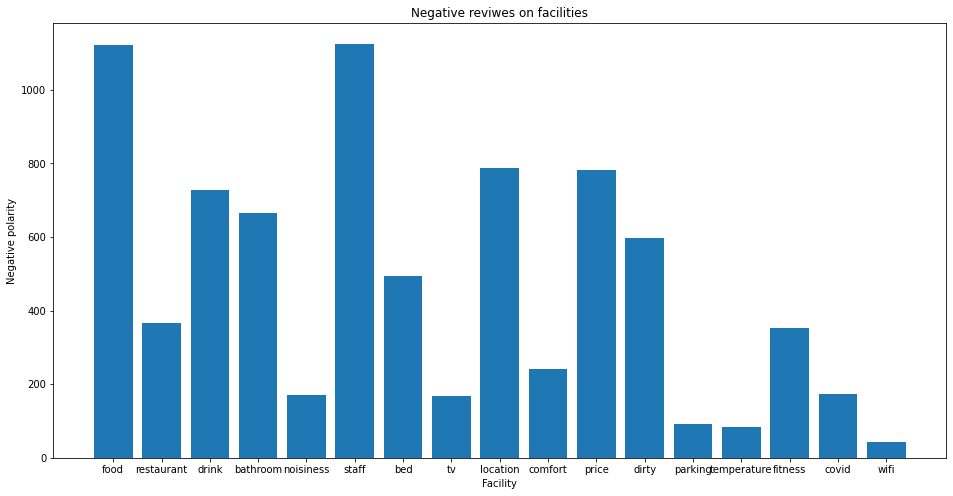

In [46]:
fac_poz = {}
for x, y in zip(df['Facilities'], df['Positive']):  
    if y == 1:
        sp = x.split('|')
        for s in sp:
            if s != '':
                if s in fac_poz.keys():
                    fac_poz[s] = fac_poz[s] + 1
                else:
                    fac_poz[s] = 1
fac_neg = {}
for x, y in zip(df['Facilities'], df['Negative']):  
    if y == 1:
        sp = x.split('|')
        for s in sp:
            if s != '':
                if s in fac_neg.keys():
                    fac_neg[s] = fac_neg[s] + 1
                else:
                    fac_neg[s] = 1
print(fac_poz)
print(fac_neg)
plt.figure(figsize=(16,8))
plt.ylabel('Positive polarity')
plt.xlabel('Facility')
plt.title('Positive reviwes on facilities')
keys = fac_poz.keys()
values = fac_poz.values()
plt.bar(keys, values)

plt.figure(figsize=(16,8))
plt.ylabel('Negative polarity')
plt.xlabel('Facility')
plt.title('Negative reviwes on facilities')
keys = fac_neg.keys()
values = fac_neg.values()
plt.bar(keys, values)